<h1 style="color:green"><center><i>Acoustic Extinguisher Fire</i></center></h1>

<h1 style="color:#88bddb">Content</h1>

- 1.<a href="#1">Overview</a>
- 2.<a href="#2">Importing librarires</a>
- 3.<a href="#3">Load Dataset</a>
- 4.<a href="#4">Data Understanding</a>
- 5.<a href="#5">Data-Preprocessing</a>
- 6.<a href="#6">Modelling</a>

<a id="1"></a>
# 1.Overview

The dataset was obtained as a result of the extinguishing tests of four different fuel flames with a sound wave extinguishing system. The sound wave fire-extinguishing system consists of 4 subwoofers with a total power of 4,000 Watt placed in the collimator cabinet. There are two amplifiers that enable the sound come to these subwoofers as boosted. Power supply that powers the system and filter circuit ensuring that the sound frequencies are properly transmitted to the system is located within the control unit. While computer is used as frequency source, anemometer was used to measure the airflow resulted from sound waves during the extinguishing phase of the flame, and a decibel meter to measure the sound intensity. An infrared thermometer was used to measure the temperature of the flame and the fuel can, and a camera is installed to detect the extinction time of the flame. A total of 17,442 tests were conducted with this experimental setup.

### Keywords :

- Fire, Extinguishing System, Sound wave, Machine learning, Fire safety, Low frequency, Acoustic

- Data properties and descriptions for liquid fuels
- FEATURES MIN/MAX VALUES UNIT DESCRIPTIONS
- SIZE 7, 12, 14, 16, 20 cm Recorded as 7 cm=1, 12 cm=2, 14 cm=3, 16 cm=4, 20 cm=5
- FUEL Gasoline, Kerosene, Thinner Fuel type
- DISTANCE 10 - 190 cm
- DESIBEL 72 - 113 dB
- AIRFLOW 0 - 17 m/s
- FREQUENCY 1-75 Hz
- STATUS 0, 1 0 indicates the non-extinction state, 1 indicates the extinction state

- Data properties and descriptions for LPG
- FEATURES MIN/MAX VALUES UNIT DESCRIPTIONS
- SIZE Half throttle setting, Full throttle setting Reocerded as Half throttle setting=6, Full - - throttle setting=7
- FUEL LPG Fuel type
- DISTANCE 10 - 190 cm
- DESIBEL 72 - 113 dB
- AIRFLOW 0 - 17 m/s
- FREQUENCY 1-75 Hz
- STATUS 0, 1 [0 indicates the non-extinction state, 1 indicates the extinction (అంతరించిపోవడం)  state]

<a id="2"></a>
# 2.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 

**To Perform Operation On xlsx file we have to import openpyxl**

In [2]:
!pip install openpyxl

<a id="3"></a>
# 3.Load Datasets

In [3]:
df=pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


<a id="4"></a>
# 4.Data Understanding & EDA

In [4]:
df.shape

(17442, 7)

In [5]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [7]:
df.describe(include="all")

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,gasoline,NaN,NaN,NaN,NaN,NaN
freq,NaN,5130,NaN,NaN,NaN,NaN,NaN
mean,3.411765,NaN,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,NaN,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,NaN,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,NaN,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,NaN,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,NaN,150.000000,104.000000,11.200000,47.000000,1.000000


In [8]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

 No Null Values

In [9]:
df.describe(include=["object"])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


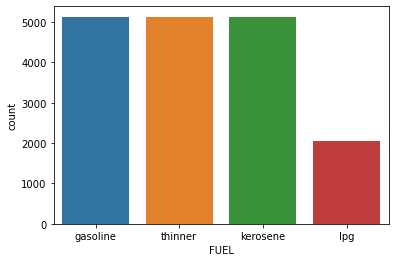

In [10]:
sns.countplot(df["FUEL"])
plt.show()

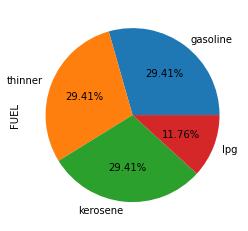

In [11]:
df["FUEL"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

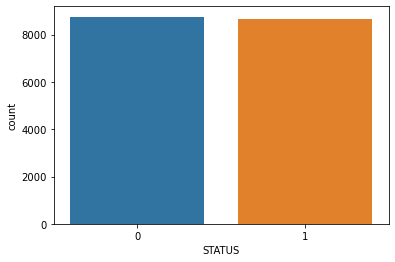

In [12]:
sns.countplot(df["STATUS"])
plt.show()

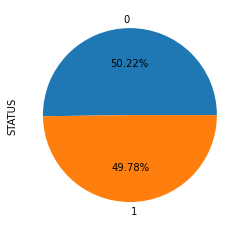

In [13]:
df["STATUS"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

<a id="5"></a>
# 5.Data Preprocessing

<h4 style="color:orange"><i>Ordinal Encoding</i></h4>

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
oe=OrdinalEncoder()
df["FUEL"]=oe.fit_transform(df[["FUEL"]])

In [16]:
oe.categories_

[array(['gasoline', 'kerosene', 'lpg', 'thinner'], dtype=object)]

In [17]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.0,10,96,0.0,75,0
1,1,0.0,10,96,0.0,72,1
2,1,0.0,10,96,2.6,70,1
3,1,0.0,10,96,3.2,68,1
4,1,0.0,10,109,4.5,67,1


In [18]:
from scipy.stats import skew

SIZE
Skewness: 0.2786998636581806


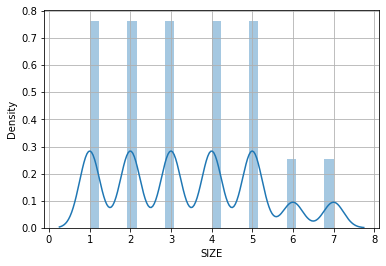

FUEL
Skewness: 0.20959140221588837


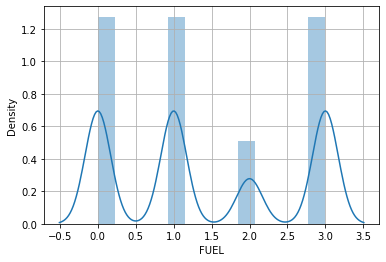

DISTANCE
Skewness: 0.0


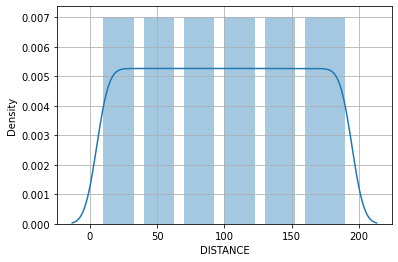

DESIBEL
Skewness: -0.17903195807888958


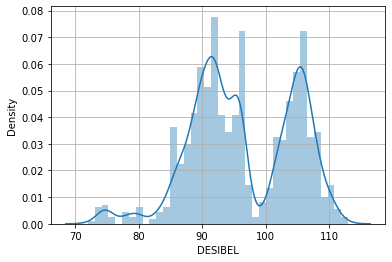

AIRFLOW
Skewness: 0.24434745944124117


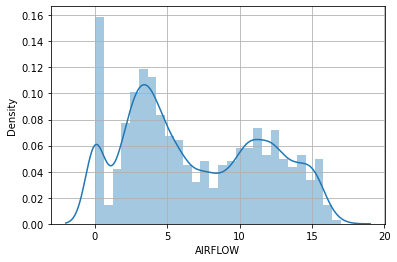

FREQUENCY
Skewness: 0.4348548916349596


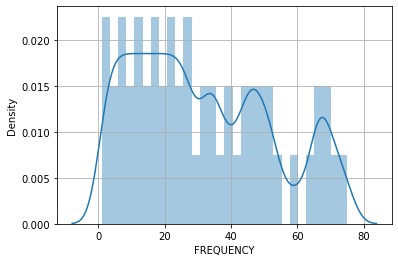

STATUS
Skewness: 0.008714679678955612


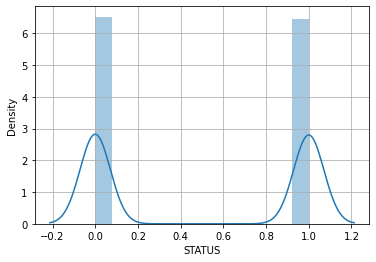

In [19]:
for col in df:
    print(col)
    print(f"Skewness: {skew(df[col])}")
    
    plt.figure()
    sns.distplot(df[col])
    plt.grid(True)
    plt.show()

In [20]:
df.corr()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,1.161420e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,1.161420e-01,1.000000e+00,-5.956652e-16,-1.383383e-14,-8.832434e-16,-1.081887e-15,-0.019384
DISTANCE,-2.437871e-15,-5.956652e-16,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.383383e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.832434e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-1.081887e-15,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.938442e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [21]:
df.corr()["STATUS"].sort_values()

DISTANCE    -0.644051
FREQUENCY   -0.244203
SIZE        -0.096947
FUEL        -0.019384
DESIBEL      0.203970
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64

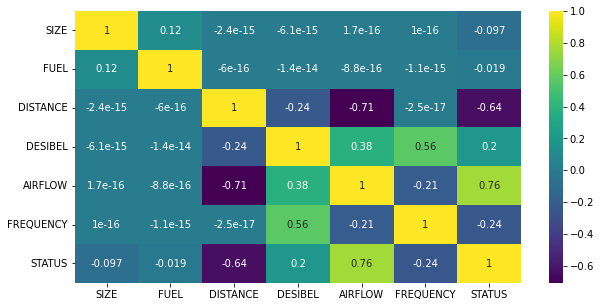

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

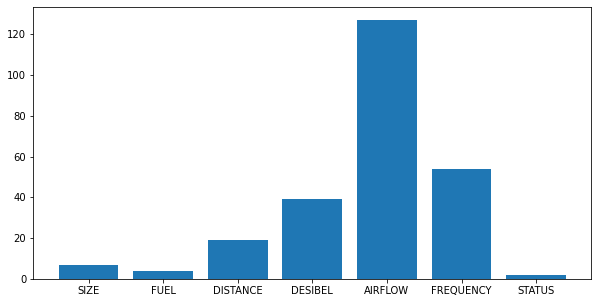

In [23]:
plt.figure(figsize=(10,5))
plt.bar(df.columns,df.nunique())
plt.show()

In [24]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

<a id="6"></a>
# 6.Data Prepartion

In [25]:
x=df.iloc[ : , :-1]
x.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [26]:
y=df.iloc[ : ,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: STATUS, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<a id="7"></a>
# 7.Modelling

<h1 style="color:red"><i>KNN</i></h1>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [32]:
accuracy_score(ytest,ypred)

0.9598700554175426

In [33]:
confusion_matrix(ytest,ypred)

array([[2553,  111],
       [  99, 2470]], dtype=int64)

<h4 style="color:orange"><i>Hyper Parameter Tunning</i></h4>

In [34]:
accuracy=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

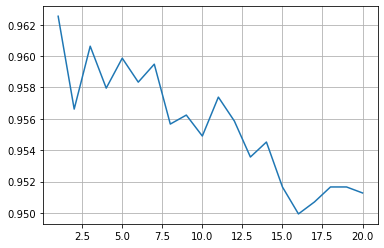

In [35]:
plt.plot(range(1,21),accuracy)
plt.grid(True)
plt.show()

In [36]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [38]:
accuracy_score(ytest,ypred)

0.9606344353143512

In [39]:
confusion_matrix(ytest,ypred)

array([[2549,  115],
       [  91, 2478]], dtype=int64)

<h4 style="color:orange"><i>Cross Validation Score</i></h4>

In [40]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(knn,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.9220407  0.88650043 0.91542431 0.90166284 0.83486239]
CVS Mean: 0.8920981341095606
CVS Standard Deviation: 0.03111082349186224


<h4 style="color:orange"><i>Bagging</i></h4>

In [41]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(knn)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [43]:
accuracy_score(ytest,ypred)

0.9615899101853621

In [44]:
confusion_matrix(ytest,ypred)

array([[2557,  107],
       [  94, 2475]], dtype=int64)

<h1 style="color:red"><i>Logistic Regression</i></h1>

In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [47]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [48]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]], dtype=int64)

<h4 style="color:orange"><i>Hyper Parameter Tunning</i></h4>

In [49]:
params={
    "C": np.logspace(-3,3,7),
    "solver": ["liblinear","lbfgs","sag","saga","newton-cg"],
    "penalty": ["l1","l2","elasticnet"]
}

In [50]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(logreg,params,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.876 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.866 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.869 total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.001, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.001, pena

[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.870 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.880 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.878 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.870 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.870 total time=   0.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.876 total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.880 total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.878 total time=   0.0s
[CV 3/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.870 total time=   0.0s
[CV 4/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.870 total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.876 total time=   0.0s
[CV 1/5] END ...C=0.01, 

[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.878 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.879 total time=   0.0s
[CV 3/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 4/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.872 total time=   0.0s
[CV 5/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......C=1.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .......C=1.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .......C=1

[CV 1/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.879 total time=   0.0s
[CV 2/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.879 total time=   0.0s
[CV 3/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 4/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.872 total time=   0.0s
[CV 5/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 1/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.879 total time=   0.0s
[CV 2/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.879 total time=   0.0s
[CV 3/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 4/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.872 total time=   0.0s
[CV 5/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 1/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.879 total time=   0.0s
[CV 2/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.879 total time=   0.1s
[CV 3/5] END ....C

[CV 5/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.875 total time=   0.0s
[CV 1/5] END C=100.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, penalty=elasti

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga',
                                    'newton-cg']},
             verbose=3)

In [51]:
grid.best_score_

0.875911109053264

In [52]:
grid.best_params_

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [53]:
grid.best_estimator_

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [54]:
logreg=grid.best_estimator_
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [55]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.87      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [56]:
accuracy_score(ytest,ypred)

0.8752149818459775

In [57]:
confusion_matrix(ytest,ypred)

array([[2369,  295],
       [ 358, 2211]], dtype=int64)

<h4 style="color:orange"><i>Cross Validation Score</i></h4>

In [58]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(logreg,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.88793351 0.84895385 0.88274083 0.89048165 0.8122133 ]
CVS Mean: 0.8644646280183329
CVS Standard Deviation: 0.030108065959694022


<h4 style="color:orange"><i>Bagging</i></h4>

In [59]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(logreg)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2664
           1       0.88      0.86      0.87      2569

    accuracy                           0.88      5233
   macro avg       0.88      0.88      0.88      5233
weighted avg       0.88      0.88      0.88      5233



In [61]:
accuracy_score(ytest,ypred)

0.8755971717943818

In [62]:
confusion_matrix(ytest,ypred)

array([[2372,  292],
       [ 359, 2210]], dtype=int64)

<h1 style="color:red"><i>DecesionTree</i></h1>

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [65]:
accuracy_score(ytest,ypred)

0.9617810051595643

In [66]:
confusion_matrix(ytest,ypred)

array([[2560,  104],
       [  96, 2473]], dtype=int64)

<h4 style="color:orange"><i>Hyper Parameter Tunning</i></h4>

Criterion--> "GINI"

In [67]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9636919549015861 18


In [68]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="gini",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9612077202369578 1


Criterion-->"ENTROPY"

In [69]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9677049493598319 26


In [70]:
s=0
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    ss=accuracy_score(ytest,ypred)
    if(s<ss):
        s=ss
        a=i
print(s,a)

0.9652207146952035 1


SUMMARY:
    Criterion "GINI"
        - Max depth: 96.29%
        - Min samples leaf: 96.00%
    Criterion "ENTROPY"
        - Max depth: 96.81%
        - Min samples leaf: 96.69%

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2664
           1       0.90      0.94      0.92      2569

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233



In [72]:
accuracy_score(ytest,ypred)

0.919740110835085

In [73]:
confusion_matrix(ytest,ypred)

array([[2386,  278],
       [ 142, 2427]], dtype=int64)

<h4 style="color:orange"><i>Cross Validation Score</i></h4>

In [74]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.87159645 0.84436801 0.88818807 0.90166284 0.84690367]
CVS Mean: 0.8705438093773091
CVS Standard Deviation: 0.022471541530404142


<h4 style="color:orange"><i>Bagging</i></h4>

In [75]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(dt)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)

In [76]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2664
           1       0.92      0.93      0.92      2569

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233



In [77]:
accuracy_score(ytest,ypred)

0.9241352952417351

In [78]:
confusion_matrix(ytest,ypred)

array([[2446,  218],
       [ 179, 2390]], dtype=int64)

<h1 style="color:red"><i>Random Forest</i></h1>

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [80]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2664
           1       0.96      0.96      0.96      2569

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [81]:
accuracy_score(ytest,ypred)

0.962545385056373

In [82]:
confusion_matrix(ytest,ypred)

array([[2566,   98],
       [  98, 2471]], dtype=int64)

<h4 style="color:orange"><i>Cross Validation Score</i></h4>

In [83]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=5,scoring="accuracy")
print(f"CVS: {cvs}")
print(f"CVS Mean: {cvs.mean()}")
print(f"CVS Standard Deviation: {cvs.std()}")

CVS: [0.91172256 0.85583262 0.90682339 0.93061927 0.84489679]
CVS Mean: 0.8899789245886811
CVS Standard Deviation: 0.033485902526965414


<h1 style="color:green"><i> Voting Classifier</i></h1>

In [84]:
models=[]
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models.append(("LogisticRegression", LogisticRegression()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))

In [85]:
from sklearn.ensemble import VotingClassifier
vt=VotingClassifier(estimators=models)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)

In [86]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2664
           1       0.98      0.95      0.96      2569

    accuracy                           0.97      5233
   macro avg       0.97      0.97      0.97      5233
weighted avg       0.97      0.97      0.97      5233



In [87]:
confusion_matrix(ytest,ypred)

array([[2608,   56],
       [ 124, 2445]], dtype=int64)

In [88]:
accuracy_score(ytest,ypred)

0.9656029046436079

<h1 style="color:red"><i>Boosting</i></h1>

<h4 style="color:red"><i>AdaBoostClassifier</i></h4>

In [89]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred = abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2664
           1       0.93      0.92      0.92      2569

    accuracy                           0.92      5233
   macro avg       0.92      0.92      0.92      5233
weighted avg       0.92      0.92      0.92      5233



In [90]:
accuracy_score(ytest,ypred)

0.9229887253965221

In [91]:
confusion_matrix(ytest,ypred)

array([[2474,  190],
       [ 213, 2356]], dtype=int64)

<h5 style="color:orange"><i>Gradient Boosting</i></h5>

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2664
           1       0.95      0.94      0.94      2569

    accuracy                           0.94      5233
   macro avg       0.94      0.94      0.94      5233
weighted avg       0.94      0.94      0.94      5233



In [93]:
accuracy_score(ytest,ypred)

0.9428626027135486

In [94]:
confusion_matrix(ytest,ypred)

array([[2530,  134],
       [ 165, 2404]], dtype=int64)

<h4 style="color:red"><i>XG Boosting</i></h4>

In [95]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(xtrain, ytrain)
ypred = xg.predict(xtest)
print(classification_report(ytest, ypred))

[20:27:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2664
           1       0.98      0.98      0.98      2569

    accuracy                           0.98      5233
   macro avg       0.98      0.98      0.98      5233
weighted avg       0.98      0.98      0.98      5233



In [96]:
accuracy_score(ytest,ypred)

0.9772596980699407

In [97]:
confusion_matrix(ytest,ypred)

array([[2606,   58],
       [  61, 2508]], dtype=int64)

<h1 style="color:brown"><i>Summary</i></h1>

###### The Accuracy achieved per model is as follows:

Model name: KNN
    - Initial Accuracy: 95.98%,
    - Accuracy Post Hyper-parameter Tuning: 96.06%,
    - Cross Validation Score: 89.07%,
    - Bagging Accuracy: 96.00%,
    - Best Accuracy Achieved: 96.06%
        
        
Model name: Logistic Regression
    - Initial Accuracy: 87.52%,
    - Accuracy Post Hyper-parameter Tuning: 87.52%,
    - Cross Validation Score: 86.45%,
    - Bagging Accuracy: 87.57%,
    - Best Accuracy Achieved: 87.57%

        
Model name: Decision Tree
    - Initial Accuracy: 96.06%,
    - Accuracy Post Hyper-parameter Tuning: 96.65%,
        Criterion Gini:
            Max Depth best Accuracy- 96.29%,
            Min Samples Leaf best Accuracy- 96.00%,
        Criterion Entropy:
            Max Depth best Accuracy- 96.81%,
            Min Samples Leaf best Accuracy- 96.69%,
    - Cross Validation Score: 85.46%,
    - Bagging Accuracy: 96.52%,
    - Best Accuracy Achieved: 96.65%

        
Model name: Random Forest
    - Initial Accuracy: 96.25%,
    - Cross Validation Score: 88.89%,
    - Best Accuracy Achieved: 96.25%
    
        
        
Voting Classifier Accuracy: 94.68%


Boosting:
    - Ada Boosting: 92.29%,
    - Gradient Boosting: 94.28%,
    - XG Boosting: 93.96%,